Logistic Regression
f1: 0.23138131831377784, precision: 0.16974958286259806, recall: 0.3712418300653595, accuracy: 0.9284111112923483
Support Vector Machines
f1: 0.2181878264577337, precision: 0.16467348544453186, recall: 0.32679738562091504, accuracy: 0.9307207986037485
Naive Bayes
f1: 0.08105263157894738, precision: 0.5, recall: 0.04444444444444444, accuracy: 0.9709668825202125
Decision Trees
f1: 0.23137282953684424, precision: 0.18505398110661267, recall: 0.31568627450980397, accuracy: 0.9386394158361471
Random Forest
f1: 0.24802555168408827, precision: 0.20627763041556144, recall: 0.32679738562091504, accuracy: 0.941939202157448


/home/luca/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/luca/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/luca/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


K-Nearest Neighbor
f1: 0.08031189083820663, precision: 0.28888888888888886, recall: 0.05555555555555556, accuracy: 0.9706363058052098


/home/luca/.local/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:576: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/luca/.local/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:588: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/home/luca/.local/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:600: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
/h

BRF
f1: 0.24082124610345876, precision: 0.18041871921182268, recall: 0.3712418300653595, accuracy: 0.9310497441836441
SMOTE Logistic Regression
f1: 0.24637323556468632, precision: 0.19049019607843137, recall: 0.34901960784313724, accuracy: 0.9376465982677346
SMOTE Support Vector Machines
f1: 0.255940977261732, precision: 0.20338123718386875, recall: 0.373202614379085, accuracy: 0.940615807874033
SMOTE Naive Bayes
f1: 0.17567656924583114, precision: 0.14982705037203545, recall: 0.48235294117647054, accuracy: 0.7620679530885542
SMOTE Decision Trees
f1: 0.19691841777239621, precision: 0.2072897761645493, recall: 0.3509803921568627, accuracy: 0.9449046057818302
SMOTE Random Forest
f1: 0.2121964777872983, precision: 0.21909814323607427, recall: 0.32679738562091504, accuracy: 0.8887989952207741
SMOTE K-Nearest Neighbor
f1: 0.12457202879409754, precision: 0.11396735207381595, recall: 0.47581699346405226, accuracy: 0.6189826066626433


/home/luca/.local/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:576: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/luca/.local/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:588: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/home/luca/.local/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:600: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
/h

SMOTE BRF
f1: 0.2622243205314792, precision: 0.21909814323607427, recall: 0.373202614379085, accuracy: 0.9455646717884308


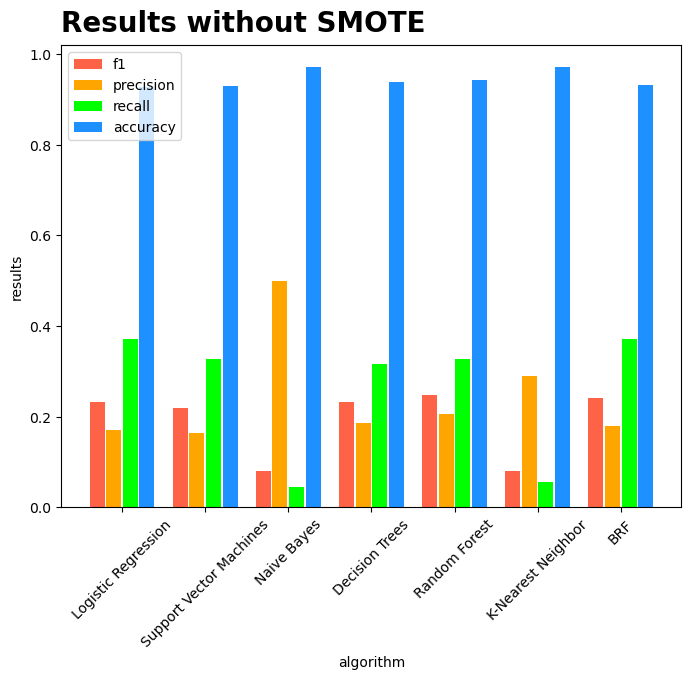

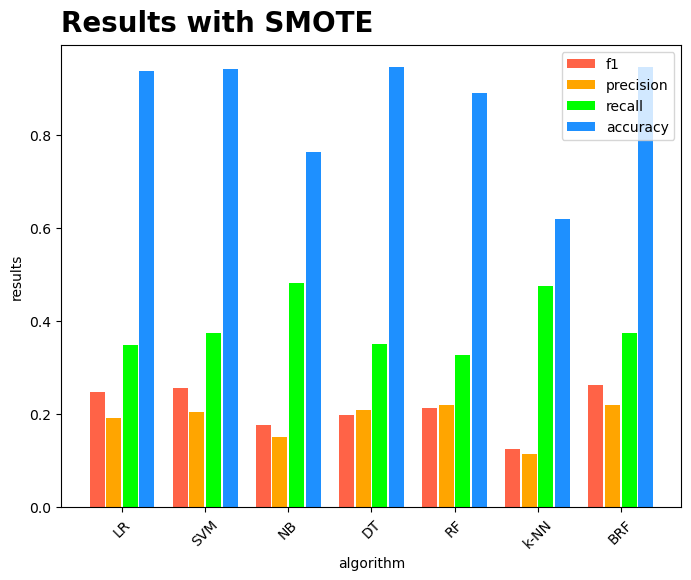

'\nmodels["Random Forest"].fit(X_train, y_train)\ny_pred = models["Random Forest"].predict(X_test)\nprint(f1_score(y_test, y_pred))\nprint(recall_score(y_test, y_pred))\nprint(precision_score(y_test, y_pred))\n\nX_test["pred"] = y_pred\nX_test["truth"] = y_test\n\nX_test = X_test.drop(X_test[X_test.truth == X_test.pred].index)\n\nX_test.to_csv("../data/result_analysis.csv")\n\n'

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE #-> oversampling technique
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

np.random.seed(42)

df = pd.read_csv("../data/processed/extended_dataset/data_ref.csv")

X = df.drop(['literature_review'], axis=1)
y = df['literature_review']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=42)

models = {}
models['Logistic Regression'] = LogisticRegression(class_weight='balanced', max_iter = 200)
models['Support Vector Machines'] = SVC(class_weight='balanced')
models['Naive Bayes'] = BernoulliNB()
models['Decision Trees'] = DecisionTreeClassifier(class_weight='balanced')
models['Random Forest'] = RandomForestClassifier(class_weight='balanced')
models['K-Nearest Neighbor'] = KNeighborsClassifier()
models['BRF'] = BalancedRandomForestClassifier()

accuracy = {}
precision = {}
recall = {}
conf_mat = {}
f1 = {}

for key in models.keys():
    accuracy[key] = np.mean(cross_val_score(models[key], X_train, y_train, scoring="accuracy"))
    precision[key] = np.mean(cross_val_score(models[key], X_train, y_train, scoring="precision"))
    recall[key] = np.mean(cross_val_score(models[key], X_train, y_train, scoring="recall"))
    f1[key] = np.mean(cross_val_score(models[key], X_train, y_train, scoring="f1"))
    y_pred = cross_val_predict(models[key], X_train, y_train)
    conf_mat[key] = confusion_matrix(y_train, y_pred)
    print(key)
    print(f"f1: {f1[key]}, precision: {precision[key]}, recall: {recall[key]}, accuracy: {accuracy[key]}")


# oversampling with SMOTE

smote_models = ['LR', 'SVM', 'NB', 'DT', 'RF', 'k-NN', 'BRF']
accuracy_smote = {}
precision_smote = {}
recall_smote = {}
f1_smote = {}

for key in models.keys():
    name = 'SMOTE ' + key
    pipeline = imbpipeline(steps = [['smote', SMOTE()], ['classifier', models[key]]])
    stratified_kfold = StratifiedKFold(n_splits=5)
    accuracy_smote[name] = np.mean(cross_val_score(pipeline, X_train, y_train, scoring = 'accuracy', cv=stratified_kfold))
    precision_smote[name] = np.mean(cross_val_score(pipeline, X_train, y_train, scoring = 'precision', cv=stratified_kfold))
    recall_smote[name] = np.mean(cross_val_score(pipeline, X_train, y_train, scoring = 'recall', cv=stratified_kfold))
    f1_smote[name] = np.mean(cross_val_score(pipeline, X_train, y_train, scoring = 'f1', cv=stratified_kfold))
    print(name)
    print(f"f1: {f1_smote[name]}, precision: {precision_smote[name]}, recall: {recall_smote[name]}, accuracy: {accuracy_smote[name]}")


# plot overview of results

# without smote
plt.figure(figsize=(8,6))
plt.bar(x=[0,5,10,15,20,25,30], height=list(f1.values()), width=0.9, color="tomato", label="f1")
plt.bar(x=[1,6,11,16,21,26,31], height=list(precision.values()), width=0.9, color="orange", label="precision")
plt.bar(x=[2,7,12,17,22,27,32], height=list(recall.values()), width=0.9, color="lime", label="recall")
plt.bar(x=[3,8,13,18,23,28,33], height=list(accuracy.values()), width=0.9, color="dodgerblue", label="accuracy")

plt.xlabel("algorithm")
plt.ylabel("results")

plt.xticks(ticks=[1.5, 6.5, 11.5, 16.5, 21.5, 26.5, 31.5], labels=list(models.keys()), rotation=45)
plt.title("Results without SMOTE", loc="left", fontdict=dict(fontsize=20, fontweight="bold"), pad=10)
plt.legend(loc='best')
plt.show()

# with smote
plt.figure(figsize=(8,6))
plt.bar(x=[0,5,10,15,20,25,30], height=list(f1_smote.values()), width=0.9, color="tomato", label="f1")
plt.bar(x=[1,6,11,16,21,26,31], height=list(precision_smote.values()), width=0.9, color="orange", label="precision")
plt.bar(x=[2,7,12,17,22,27,32], height=list(recall_smote.values()), width=0.9, color="lime", label="recall")
plt.bar(x=[3,8,13,18,23,28,33], height=list(accuracy_smote.values()), width=0.9, color="dodgerblue", label="accuracy")

plt.xlabel("algorithm")
plt.ylabel("results")

plt.xticks(ticks=[1.5, 6.5, 11.5, 16.5, 21.5, 26.5, 31.5], labels=smote_models, rotation=45)
plt.title("Results with SMOTE", loc="left", fontdict=dict(fontsize=20, fontweight="bold"), pad=10)
plt.legend(loc='best')
plt.show()

'''
models["Random Forest"].fit(X_train, y_train)
y_pred = models["Random Forest"].predict(X_test)
print(f1_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

X_test["pred"] = y_pred
X_test["truth"] = y_test

X_test = X_test.drop(X_test[X_test.truth == X_test.pred].index)

X_test.to_csv("../data/result_analysis.csv")

'''
